In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t, f
import scipy.stats as stats
import numpy as np
data = pd.read_csv('anggur.csv')

# Nomor 1

In [21]:
for atr in data.columns:
    print(f"Atribut : {atr}")
    print(f"Mean : {data[atr].mean()}")
    print(f"Median : {data[atr].median()}")
    print(f"Modus :\n    Nilai : {data[atr].mode()[0]} \n    Frekuensi : {data[atr].value_counts()[data[atr].mode()[0]]}")
    print(f"Standar Deviasi : {data[atr].std()}")
    print(f"Variansi : {data[atr].var()}")
    print(f"Range : {data[atr].max() - data[atr].min()}")
    print(f"Nilai Minimum : {data[atr].min()}")
    print(f"Nilai Maksimum : {data[atr].max()}")
    print(f"Kuartil 1 : {data[atr].quantile(0.25)}")
    print(f"Kuartil 2 : {data[atr].quantile(0.5)}")
    print(f"Kuartil 3 : {data[atr].quantile(0.75)}")
    print(f"IQR : {data[atr].quantile(0.75) - data[atr].quantile(0.25)}")
    print(f"Skewness : {data[atr].skew()}")
    print(f"Kurtosis : {data[atr].kurt()}")
    print("\n\n")

Atribut : fixed acidity
Mean : 7.15253
Median : 7.15
Modus :
    Nilai : 6.54 
    Frekuensi : 11
Standar Deviasi : 1.2015975764938258
Variansi : 1.4438367358358357
Range : 8.17
Nilai Minimum : 3.32
Nilai Maksimum : 11.49
Kuartil 1 : 6.3774999999999995
Kuartil 2 : 7.15
Kuartil 3 : 8.0
IQR : 1.6225000000000005
Skewness : -0.028878575532660055
Kurtosis : -0.019292120932933532



Atribut : volatile acidity
Mean : 0.5208385000000001
Median : 0.52485
Modus :
    Nilai : 0.5546 
    Frekuensi : 4
Standar Deviasi : 0.09584827405534951
Variansi : 0.009186891639389388
Range : 0.6652
Nilai Minimum : 0.1399
Nilai Maksimum : 0.8051
Kuartil 1 : 0.4561
Kuartil 2 : 0.52485
Kuartil 3 : 0.585375
IQR : 0.12927499999999997
Skewness : -0.1976986986092083
Kurtosis : 0.16185290336961788



Atribut : citric acid
Mean : 0.27051699999999995
Median : 0.2722
Modus :
    Nilai : 0.3019 
    Frekuensi : 5
Standar Deviasi : 0.04909837147076348
Variansi : 0.0024106500810810814
Range : 0.29290000000000005
Nilai Minim

# Nomor 2

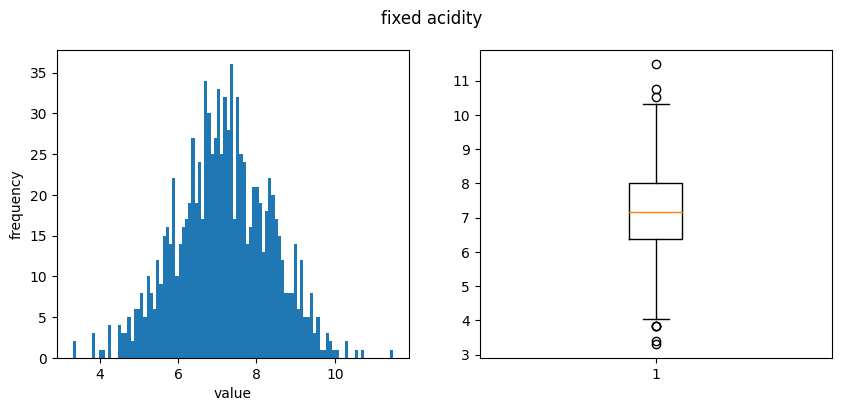

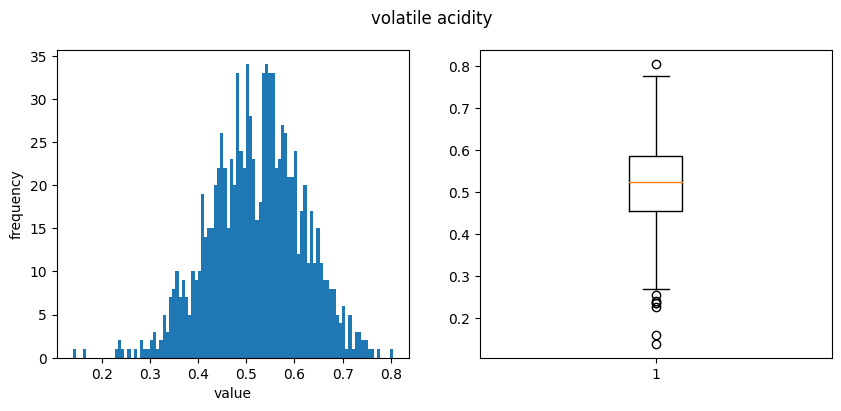

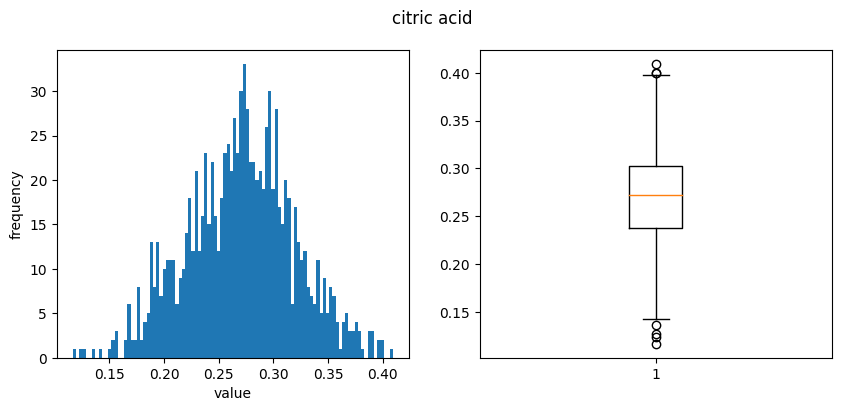

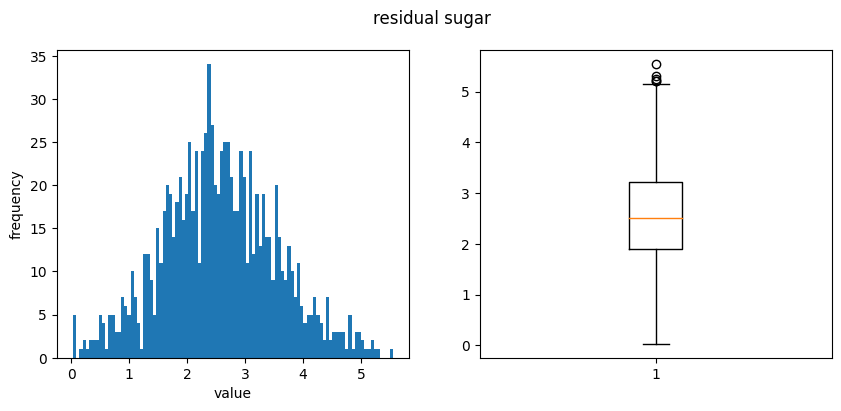

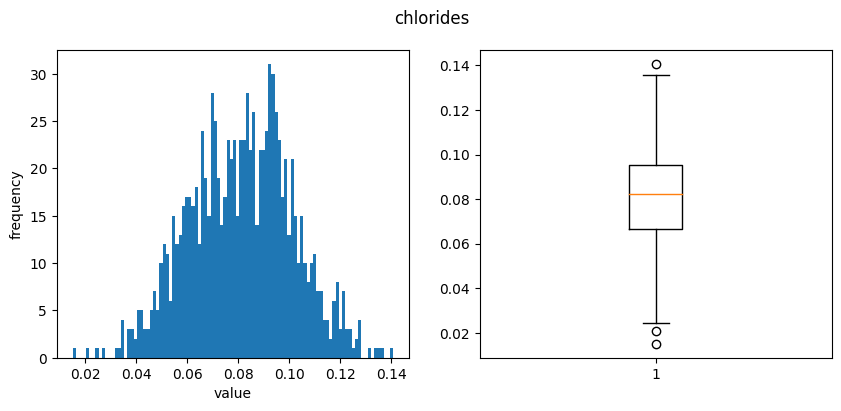

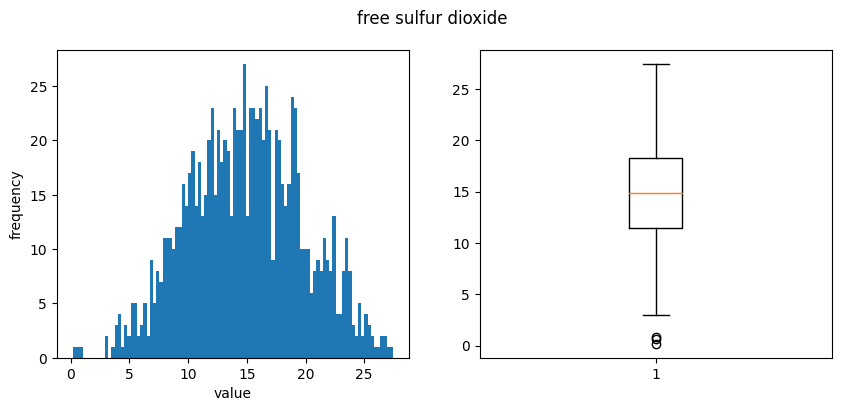

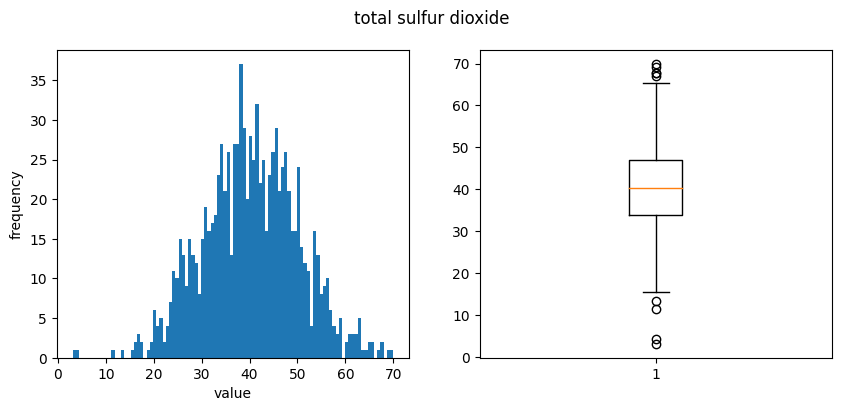

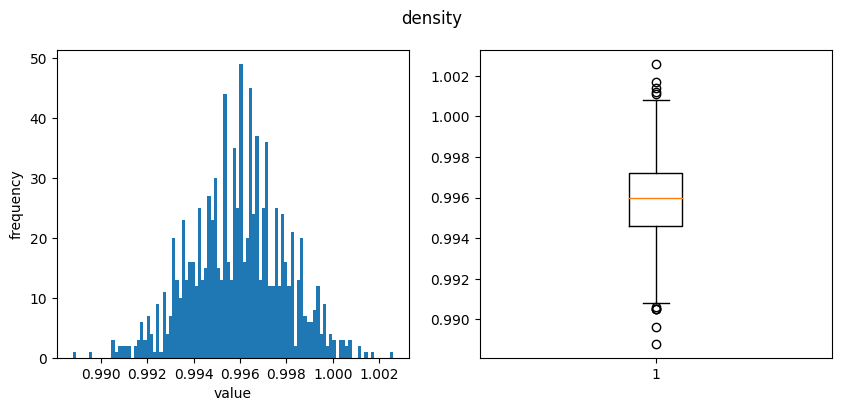

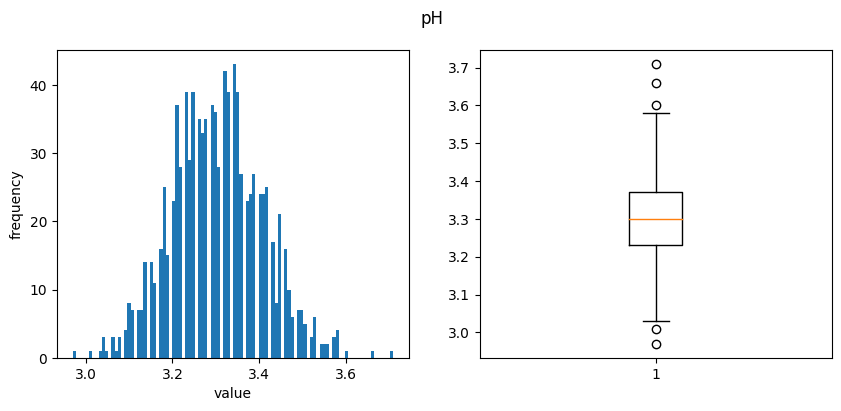

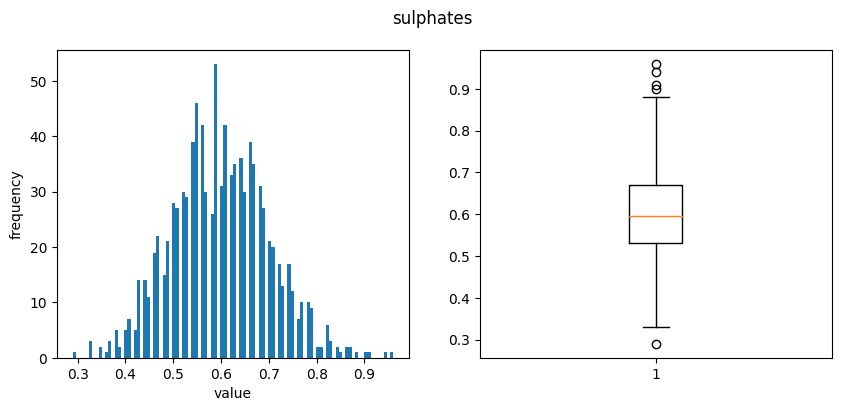

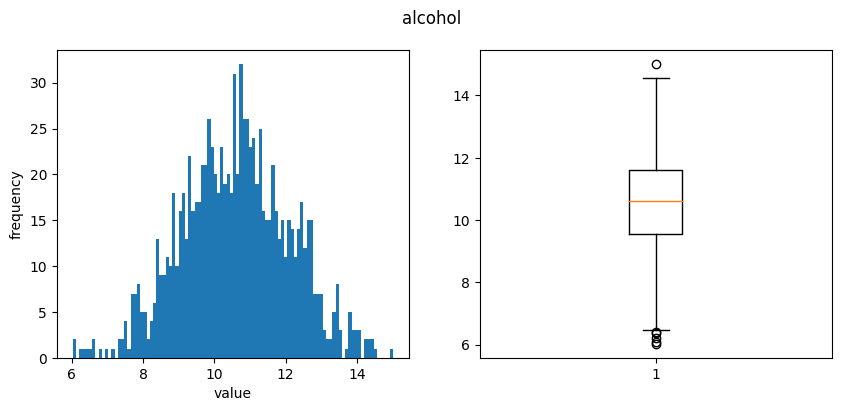

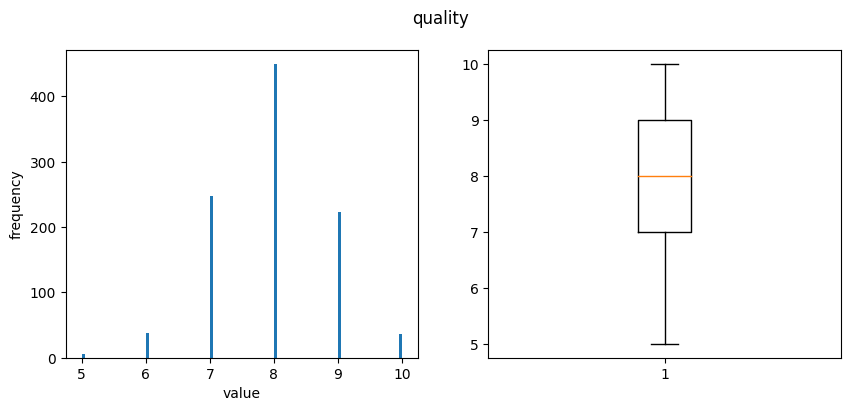

In [22]:
for atr in data.columns:
    # create a new figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
    
    # plot the histogram on the first subplot
    col = data[atr]
    ax1.hist(col, bins=100)
    ax1.set_ylabel("frequency")
    ax1.set_xlabel("value")
    
    # plot the boxplot on the second subplot
    ax2.boxplot(col)
    
    # add a title for both subplots
    plt.suptitle(atr)
    
    # display the figure
    plt.show()

# Nomor 3

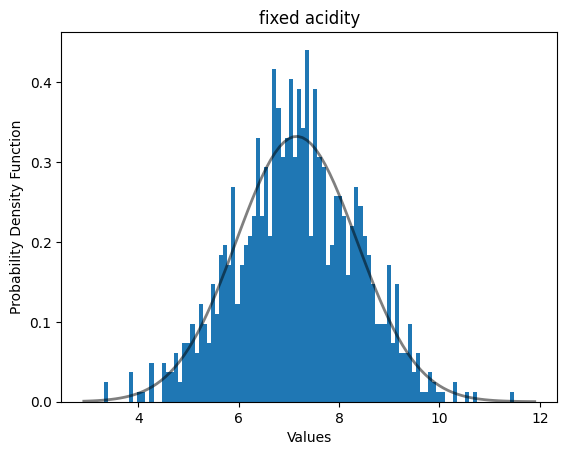

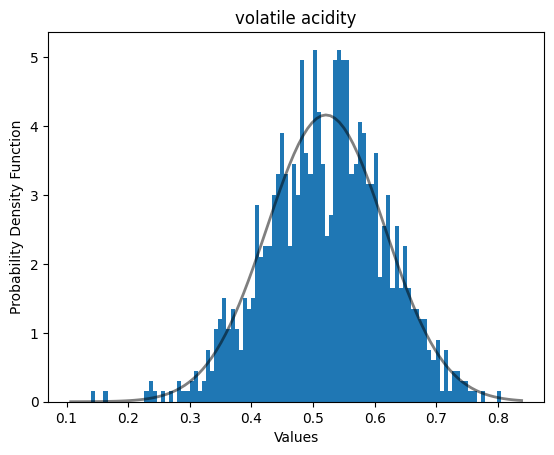

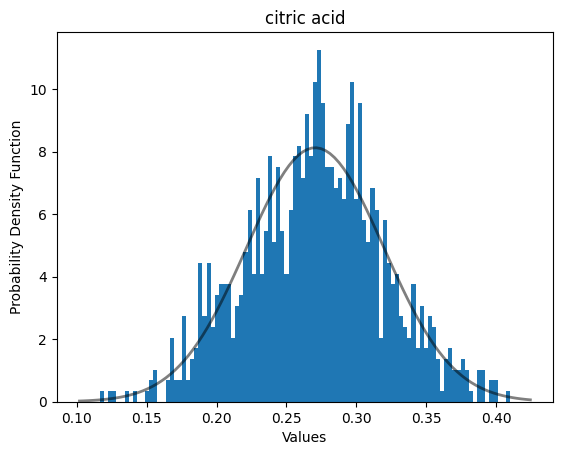

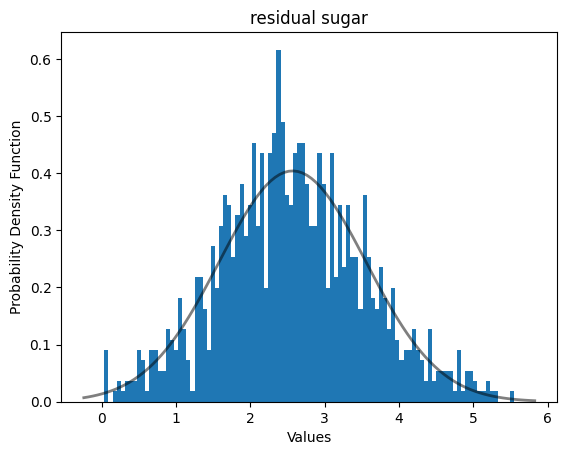

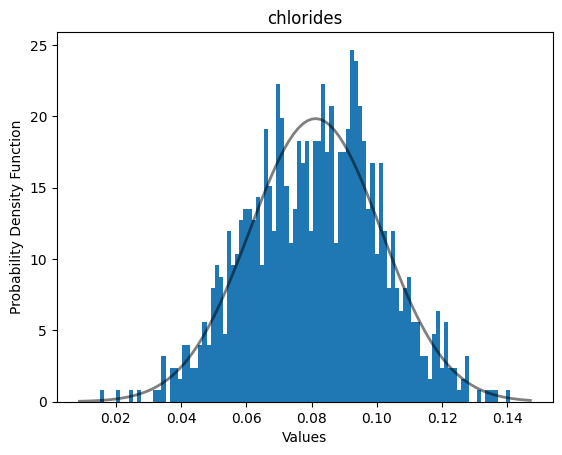

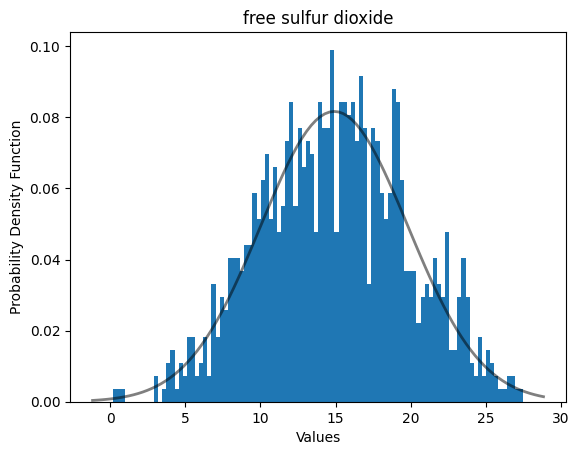

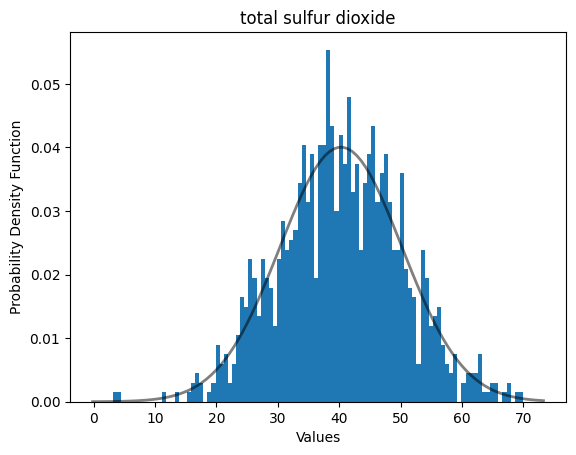

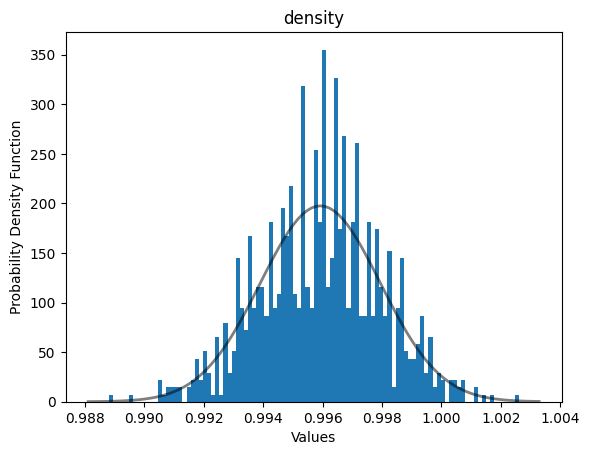

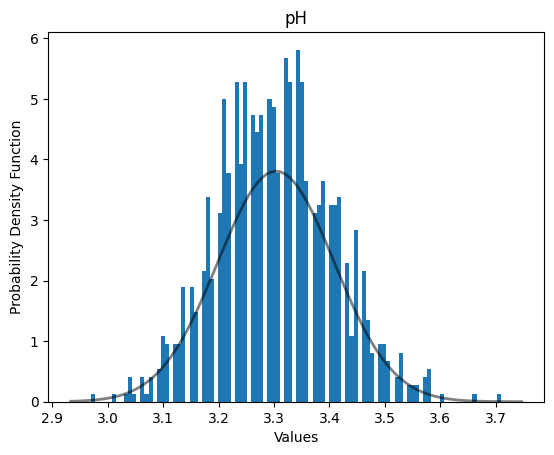

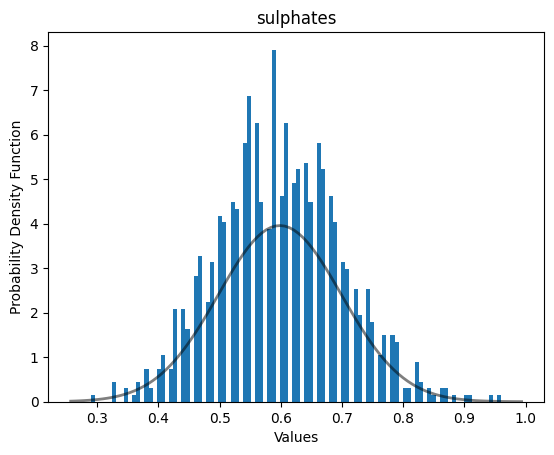

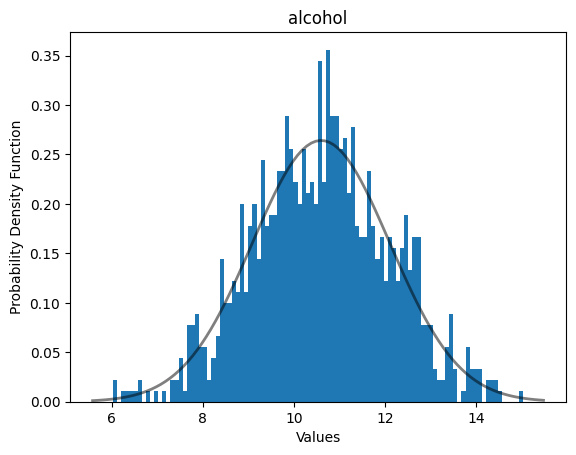

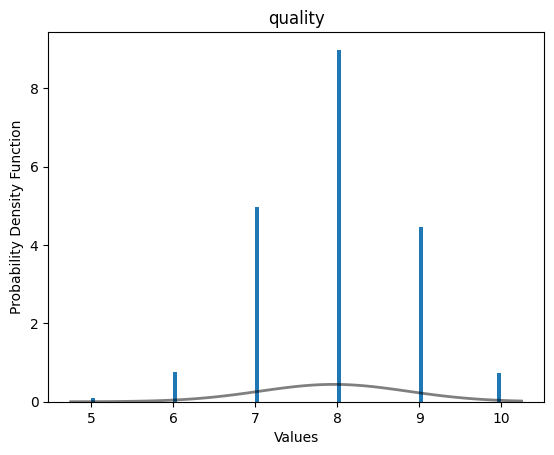

In [23]:
for atr in data.columns:
    col = data[atr]
    plt.hist(col, bins = 100, density=True)
    plt.title(atr)
    mu, std = norm.fit(col)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, alpha = 0.5)
    plt.xlabel('Values')
    plt.ylabel('Probability Density Function')
    plt.show()

# Nomor 4

### a. Nilai rata-rata pH di atas 3.29?

In [24]:
# Inisiasi Variabel
var = 3.29
alpha = 0.05
pH_mean = data['pH'].mean()
pH_std = data['pH'].std()
n = data['pH'].count()

# Menggunakan Uji Z karena data > 30
Z0 = norm.ppf(1 - (alpha))
Z = (pH_mean - var) / (pH_std / np.sqrt(n))
p_value = norm.sf(Z)

# Hasil Akhir
print(f"Z = {Z}")
print(f"Z0 = {Z0}")
print(f"p_value = {p_value}")
if Z < Z0:
    print("Z < Z0")
    print("H0 diterima")
else:
    print("Z > Z0")
    print("H0 ditolak")

if p_value > alpha:
    print("p > alpha")
    print("H0 diterima")
else:
    print("p < alpha")
    print("H0 ditolak")


Z = 4.1037807933651145
Z0 = 1.6448536269514722
p_value = 2.0322630043302333e-05
Z > Z0
H0 ditolak
p < alpha
H0 ditolak


### b. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?

In [25]:
# Inisiasi Variabel
var = 2.5
rs_mean = data['residual sugar'].mean()
rs_std = data['residual sugar'].std()
n = data['residual sugar'].count()

# Menggunakan Uji Z karena data > 30
Z0 = norm.ppf(1 - (alpha/2)) # /2 karena dua sisi
Z = (rs_mean - var) / (rs_std / np.sqrt(n))
p_value = norm.sf(Z)

# Hasil Akhir
print(f"Z = {Z}")
print(f"Z0 = {Z0}")
print(f"p_value = {p_value}")
if Z < Z0 and Z > -Z0:
    print("Z < Z0 dan Z > -Z0")
    print("H0 diterima")
else:
    print("Z > Z0 atau Z < -Z0")
    print("H0 ditolak")

if p_value > alpha/2 and p_value < 1 - alpha/2:
    print("p > alpha/2 dan p < 1 - alpha/2")
    print("H0 diterima")
else:
    print("p < alpha/2 atau p > 1 - alpha/2")
    print("H0 ditolak")

Z = 2.1479619435539523
Z0 = 1.959963984540054
p_value = 0.015858389409363717
Z > Z0 atau Z < -Z0
H0 ditolak
p < alpha/2 atau p > 1 - alpha/2
H0 ditolak


### c. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?


In [26]:
# Inisiasi Variabel 
var = 0.65
sulphates_150 = data['sulphates'].head(150)
sulphates_150_mean = sulphates_150.mean()
sulphates_150_std = sulphates_150.std()
n = 150

# Menggunakan Uji Z karena data > 30
Z0 = norm.ppf(1 - (alpha/2))
Z = (sulphates_150_mean - var) / (sulphates_150_std / np.sqrt(n))
p_value = norm.sf(Z)
# Hasil Akhir
print(f"Z = {Z}")
print(f"Z0 = {Z0}")
print(f"p_value = {p_value}")
if Z < Z0 and Z > -Z0:
    print("Z < Z0 dan Z > -Z0")
    print("H0 diterima")
else:
    print("Z > Z0 atau Z < -Z0")
    print("H0 ditolak")
    
if p_value > alpha/2 and p_value < 1 - alpha/2:
    print("p > alpha/2 dan p < 1 - alpha/2")
    print("H0 diterima")
else:
    print("p < alpha/2 atau p > 1 - alpha/2")
    print("H0 ditolak")

Z = -4.964843393315918
Z0 = 1.959963984540054
p_value = 0.9999996562173541
Z > Z0 atau Z < -Z0
H0 ditolak
p < alpha/2 atau p > 1 - alpha/2
H0 ditolak


### d. Nilai rata-rata total sulfur dioxide di bawah 35?

In [27]:
# Inisiasi Variabel
var = 35
total_sulfur_dioxide = data['total sulfur dioxide']
total_sulfur_dioxide_mean = total_sulfur_dioxide.mean()
total_sulfur_dioxide_std = total_sulfur_dioxide.std()
n = total_sulfur_dioxide.count()
# Menggunakan Uji Z karena data > 30
Z0 = norm.ppf(1 - (alpha))
Z = (total_sulfur_dioxide_mean - var) / (total_sulfur_dioxide_std / np.sqrt(n))
p_value = norm.sf(Z)

# Hasil Akhir
print(f"Z = {Z}")
print(f"Z0 = {Z0}")
print(f"p_value = {p_value}")

if Z > Z0:
    print("Z > Z0")
    print("H0 diterima")
else:
    print("Z < Z0")
    print("H0 ditolak")

if p_value > alpha:
    print("p > alpha")
    print("H0 ditolak")
else:
    print("p < alpha")
    print("H0 diterima")

Z = 16.786387372296744
Z0 = 1.6448536269514722
p_value = 1.5348545974086137e-63
Z > Z0
H0 diterima
p < alpha
H0 diterima


### e. Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?

In [28]:
# Inisiasi Variabel
total_sulfur_dioxide = data.loc[data['total sulfur dioxide'] > 40, 'total sulfur dioxide']
total_sulfur_dioxide_mean = total_sulfur_dioxide.mean()
total_sulfur_dioxide_std = total_sulfur_dioxide.std()
n = total_sulfur_dioxide.count()
n_all = data['total sulfur dioxide'].count()

# Menggunakan Uji Z karena data > 30
p_count = n / n_all
p_percent = 0.5
q = 1 - p_percent

Z = (p_count - p_percent) / np.sqrt(p_percent*q/n_all)
Z0 = norm.ppf(1 - (alpha/2))

p_value = norm.sf(Z)

# Hasil Akhir
print(f"Z = {Z}")
print(f"Z0 = {Z0}")
print(f"p_value = {p_value}")
if Z < Z0 and Z > -Z0:
    print("Z < Z0 dan Z > -Z0")
    print("H0 diterima")
else:
    print("Z > Z0 atau Z < -Z0")
    print("H0 ditolak")
    
if p_value > alpha/2 and p_value < 1 - alpha/2:
    print("p > alpha/2 dan p < 1 - alpha/2")
    print("H0 diterima")
else:
    print("p < alpha/2 atau p > 1 - alpha/2")
    print("H0 ditolak")

Z = 0.7589466384404118
Z0 = 1.959963984540054
p_value = 0.22394223913205574
Z < Z0 dan Z > -Z0
H0 diterima
p > alpha/2 dan p < 1 - alpha/2
H0 diterima


# Nomor 5

### a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

In [29]:
# Inisiasi Variabel
fixed_acidity_head = data['fixed acidity'].head(data['fixed acidity'].count()//2)
fixed_acidity_tail = data['fixed acidity'].tail(data['fixed acidity'].count()//2)
head_count = fixed_acidity_head.count()
tail_count = fixed_acidity_tail.count()
head_mean = fixed_acidity_head.mean()
tail_mean = fixed_acidity_tail.mean()
head_std = fixed_acidity_head.std()
tail_std = fixed_acidity_tail.std()
head_variance = fixed_acidity_head.var()
tail_variance = fixed_acidity_tail.var()

# Menggunakan Uji Z karena data > 30
Z0 = norm.ppf(1 - (alpha/2))
Z = (head_mean - tail_mean) / np.sqrt((head_variance/head_count) + (tail_variance/tail_count))
p_value = norm.sf(Z)

print(f"Z = {Z}")
print(f"Z0 = {Z0}")
print(f"p_value = {p_value}")
if Z < Z0 and Z > -Z0:
    print("Z < Z0 dan Z > -Z0")
    print("H0 diterima")
else:
    print("Z > Z0 atau Z < -Z0")
    print("H0 ditolak")

if p_value > alpha/2 and p_value < 1 - alpha/2:
    print("p > alpha/2 dan p < 1 - alpha/2")
    print("H0 diterima")
else:
    print("p < alpha/2 atau p > 1 - alpha/2")
    print("H0 ditolak")



Z = 0.02604106999906379
Z0 = 1.959963984540054
p_value = 0.48961229021270486
Z < Z0 dan Z > -Z0
H0 diterima
p > alpha/2 dan p < 1 - alpha/2
H0 diterima


### b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

In [30]:
# H0 : mean_awal = mean_akhir + 0.001
# H1 : mean_awal != mean_akhir + 0.001

# Inisiasi Variabel
delta = 0.001
chloride_head = data['chlorides'].head(data['chlorides'].count()//2)
chloride_tail = data['chlorides'].tail(data['chlorides'].count()//2)
head_count = chloride_head.count()
tail_count = chloride_tail.count()
head_mean = chloride_head.mean()
tail_mean = chloride_tail.mean()
chlorides_std = data['chlorides'].std()

# Menggunakan Uji Z karena data > 30
Z0 = norm.ppf(1 - (alpha/2)) # /2 karena dua sisi
Z = (head_mean - tail_mean - delta) / (chlorides_std / np.sqrt(n//2))
p_value = norm.sf(Z)

# Hasil Akhir
print(f"Z = {Z}")
print(f"Z0 = {Z0}")
print(f"p_value = {p_value}")
if Z < Z0 and Z > -Z0:
    print("Z < Z0 dan Z > -Z0")
    print("H0 diterima")
else:
    print("Z > Z0 atau Z < -Z0")
    print("H0 ditolak")

if p_value > alpha/2 and p_value < 1 - alpha/2:
    print("p > alpha/2 dan p < 1 - alpha/2")
    print("H0 diterima")
else:
    print("p < alpha/2 atau p > 1 - alpha/2")
    print("H0 ditolak")





Z = -0.4731044883927298
Z0 = 1.959963984540054
p_value = 0.6819306826295056
Z < Z0 dan Z > -Z0
H0 diterima
p > alpha/2 dan p < 1 - alpha/2
H0 diterima


### c. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?

In [31]:
# Inisiasi Variabel
volatile_acidity_head = data['volatile acidity'].head(25)
volatile_acidity_head_count = volatile_acidity_head.count()
volatile_acidity_head_mean = volatile_acidity_head.mean()
volatile_acidity_head_std = volatile_acidity_head.std()
volatile_acidity_head_variance = volatile_acidity_head.var()

sulphates_head = data['sulphates'].head(25)
sulphates_head_count = sulphates_head.count()
sulphates_head_mean = sulphates_head.mean()
sulphates_head_std = sulphates_head.std()
sulphates_head_variance = sulphates_head.var()


# Menggunakan Uji t karena data < 30
dk = volatile_acidity_head_count + sulphates_head_count - 2
t0 = t.ppf(1 - alpha/2, dk)
t_uji = (volatile_acidity_head_mean - sulphates_head_mean) / np.sqrt(((volatile_acidity_head_variance*(volatile_acidity_head_count-1) +\
         sulphates_head_variance*(sulphates_head_count-1))/dk)*(1/volatile_acidity_head_count) + (1/sulphates_head_count))
print(np.sqrt(((volatile_acidity_head_variance*(volatile_acidity_head_count-1) + sulphates_head_variance*(sulphates_head_count-1))/dk)))
p_value = norm.sf(Z)    

print(f"t0 = {t0}")
print(f"t = {t_uji}")
print(f"p_value = {p_value}")
if t_uji < t0 and t_uji > -t0:
    print("t < t0 dan t > -t0")
    print("H0 diterima")
else:
    print("t > t0 atau t < -t0")
    print("H0 ditolak")

if p_value > alpha/2 and p_value < 1 - alpha/2:
    print("p > alpha/2 dan p < 1 - alpha/2")
    print("H0 diterima")
else:
    print("p < alpha/2 atau p > 1 - alpha/2")
    print("H0 ditolak")

0.10104121535294397
t0 = 2.0106347546964454
t = -0.3749707610418972
p_value = 0.6819306826295056
t < t0 dan t > -t0
H0 diterima
p > alpha/2 dan p < 1 - alpha/2
H0 diterima


### d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?

In [32]:
# Inisiasi Variabel
residual_sugar_head = data['residual sugar'].head(data['residual sugar'].count()//2)
residual_sugar_tail = data['residual sugar'].tail(data['residual sugar'].count()//2)
head_count = residual_sugar_head.count()
tail_count = residual_sugar_tail.count()
head_mean = residual_sugar_head.mean()
tail_mean = residual_sugar_tail.mean()
head_std = residual_sugar_head.std()
tail_std = residual_sugar_tail.std()
head_variance = residual_sugar_head.var()
tail_variance = residual_sugar_tail.var()
head_dk = head_count - 1
tail_dk = tail_count - 1

# Menggunakan uji f
Falpha = f.ppf(q=1-alpha/2, dfn=head_dk, dfd=tail_dk)
F1minalpha = f.ppf(q=alpha/2, dfn=head_dk, dfd=tail_dk)
F = head_variance/tail_variance
print(f"n awal = {head_count}")
print(f"rata-rata awal = {head_mean}")
print(f"simpangan baku awal = {head_std}")
print(f"variansi awal = {head_variance}")
print(f"n akhir = {tail_count}")
print(f"rata-rata akhir = {tail_mean}")
print(f"simpangan baku akhir = {tail_std}")
print(f"variansi akhir = {tail_variance}")
print(f"F(alpha){head_dk, tail_dk} = {Falpha}")
print(f"F(1-alpha){head_dk, tail_dk} = {F1minalpha}")
print(f"f = {F}")

# Hasil Akhir
if F > F1minalpha and F < Falpha:
    print(f"F > F(1-alpha){head_dk, tail_dk} dan F < F(alpha){head_dk, tail_dk}")
    print("H0 diterima")
else:
    print(f"F < F(1-alpha){head_dk, tail_dk} atau F > F(alpha){head_dk, tail_dk}")
    print("H0 ditolak")



n awal = 500
rata-rata awal = 2.5642531670563904
simpangan baku awal = 0.9735354248789823
variansi awal = 0.9477712234943005
n akhir = 500
rata-rata akhir = 2.569954197957128
simpangan baku akhir = 1.0030564181446286
variansi akhir = 1.0061221779811322
F(alpha)(499, 499) = 1.1920574017201653
F(1-alpha)(499, 499) = 0.8388857772763105
f = 0.9420041066941615
F > F(1-alpha)(499, 499) dan F < F(alpha)(499, 499)
H0 diterima


### e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

In [33]:
# Inisiasi Variabel
alcohol_awal = data.head(500).loc[data['alcohol'] > 7, 'alcohol']
alcohol_mean_awal = alcohol_awal.mean()
alcohol_std_awal = alcohol_awal.std()
n_awal = alcohol_awal.count()
n_all_awal = data['alcohol'].head(500).count()

alcohol_akhir = data.tail(500).loc[data['alcohol'] > 7, 'alcohol']
alcohol_mean_akhir = alcohol_akhir.mean()
alcohol_std_akhir = alcohol_akhir.std()
n_akhir = alcohol_akhir.count()
n_all_akhir = data['alcohol'].tail(500).count()

# Menggunakan Uji Z karena data > 30
p_awal = n_awal/n_all_awal
p_akhir = n_akhir/n_all_akhir
p = (n_awal+n_akhir)/(n_all_awal+n_all_akhir)
q = 1-p
print(np.sqrt(p * q * (1/n_all_awal + 1/n_all_akhir)))
print(f"mean awal = {alcohol_mean_awal}")
print(f"mean akhir = {alcohol_mean_akhir}")
print(f"std awal = {alcohol_std_awal}")
print(f"std akhir = {alcohol_std_akhir}")
print(f"n_awal = {n_awal}")
print(f"n_akhir = {n_akhir}")
print(p_awal, p_akhir, p, q)
Z = (p_awal - p_akhir)/(np.sqrt(p * q * (1/n_all_awal + 1/n_all_akhir)))
p_value = norm.sf(Z)
if(p_value < alpha):
    print("p < alpha")
    print("H0 ditolak")
else:
    print("p > alpha")
    print("diterima")

0.006292853089020912
mean awal = 10.594585858585859
mean akhir = 10.673555555555556
std awal = 1.4775053450796336
std akhir = 1.4413770843312543
n_awal = 495
n_akhir = 495
0.99 0.99 0.99 0.010000000000000009
p > alpha
diterima


# Table

In [34]:
df = pd.DataFrame(data)

# print the DataFrame as a table
print(df)

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             5.90            0.4451       0.1813        2.049401   0.070574   
1             8.40            0.5768       0.2099        3.109590   0.101681   
2             7.54            0.5918       0.3248        3.673744   0.072416   
3             5.39            0.4201       0.3131        3.371815   0.072755   
4             6.51            0.5675       0.1940        4.404723   0.066379   
..             ...               ...          ...             ...        ...   
995           7.96            0.6046       0.2662        1.592048   0.057555   
996           8.48            0.4080       0.2227        0.681955   0.051627   
997           6.11            0.4841       0.3720        2.377267   0.042806   
998           7.76            0.3590       0.3208        4.294486   0.098276   
999           5.87            0.5214       0.1883        2.179490   0.052923   

     free sulfur dioxide  total sulfur 